Team members:
- Abed Alqader Salameh
- Diana Salameh
- Samah Nazzal

# This is an analysis of youtube dataset that contains data about the trending videos.This analysis is to get insights into YouTube trending videos, to see what is common between these videos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
df = pd.read_csv("USvideos.csv")   

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.info()            # this is a summary of the data set showing that we have 40949 trending video

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
df[df["description"].apply(lambda x: pd.isna(x))].head()     # This is to show the videos with NaN describtion

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


We have to fill the NaN describtion with empty string " "

In [6]:
df["description"] = df["description"].fillna(value="")    

Now we have to convert the trending date entries to date format in order to use the date functions

In [7]:

df['trending_date'] = pd.to_datetime(df['trending_date'], format = "%y.%d.%m")

In [8]:
df['trending_year']= df['trending_date'].dt.year    # make new cloumn of the years only

Now we have to count the years and how much videos for each year.

In [9]:
df["trending_year"].value_counts(normalize=True)

2018    0.765562
2017    0.234438
Name: trending_year, dtype: float64

This shows which year with most trending videos. The result is 76% of videos became viral in 2018, vs 23% in 2017

In [10]:
df.describe()  

,category_id,views,likes,dislikes,comment_count,trending_year
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,2017.765562
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.423652
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2017.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,2018.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,2018.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,2018.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,2018.000000


We can conclude that 
- The average number of views of a trending video is 2,360,785.
- The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
- The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711.
- The Average comment count is 8,446 while the median is 1,856

# Histogram of views

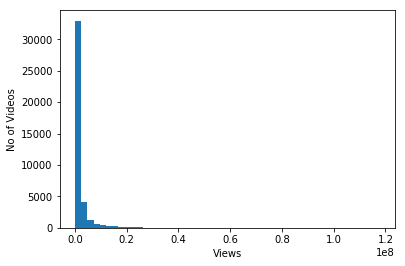

In [11]:
# To make an array to use it as bins in hitogram, the number of views here is up to 120 million
x = np.linspace(0, 120e+06, 50,endpoint=False) 
plt.hist(df['views'],bins=x)
plt.xlabel('Views')
plt.ylabel('No of Videos')
plt.show()

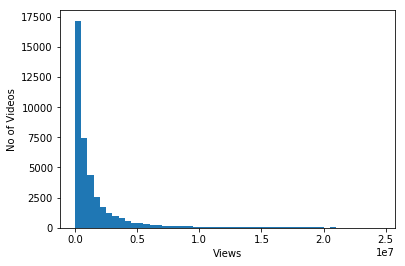

In [12]:
x = np.linspace(0, 25e+06, 50,endpoint=False)       # the same but with number of views up to 25 million
plt.hist(df['views'],bins=x)
plt.xlabel('Views')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have 5 million views or less 

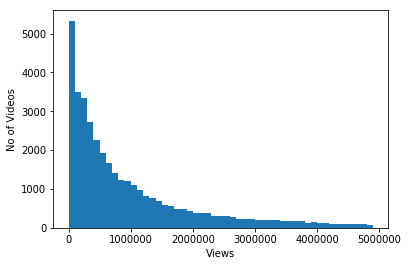

In [13]:
x = np.linspace(0, 5e+06, 50,endpoint=False)  # the same but with number of views up to 5 million
plt.hist(df['views'],bins=x)
plt.xlabel('Views')
plt.ylabel('No of Videos')
plt.show()


The above plot shows that the majority of the trending videos have 1 million views or less

In [14]:
# percentage of trending videos that have less than 1 milloin views around 60%
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100  

60.09426359618062

In [15]:
# percentage of trending videos that have less than 1.5 milloin views around 70%
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100

70.74653837700554

In [16]:
# percentage of trending videos that have less than 5 milloin views around 90%
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

90.81052040342865

# Histogram of likes

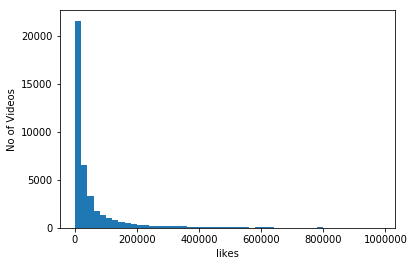

In [17]:
x = np.linspace(0, 1e+06, 50,endpoint=False) # the number of likes here is up to 1 million
plt.hist(df['likes'],bins=x)
plt.xlabel('likes')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have 100,000 views or less

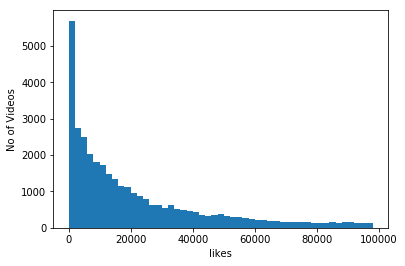

In [18]:
x = np.linspace(0, 100000, 50,endpoint=False) # the same but with number of likes up to 100,000 
plt.hist(df['likes'],bins=x)
plt.xlabel('likes')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have 40,000 likes or less

In [19]:
# percentage of trending videos that have less than 40,000 likes around 68%
df[df['likes'] < 40000]['likes'].count() / df['likes'].count() * 100

68.4900730176561

In [20]:
# percentage of trending videos that have less than 100,000 likes around 84%
df[df['likes'] < 100000]['likes'].count() / df['likes'].count() * 100

83.91657915944222

# Histogram of Comments

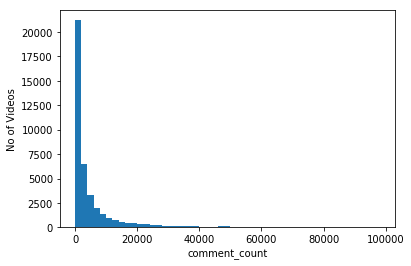

In [21]:
x = np.linspace(0, 100000, 50,endpoint=False) # the number of comments here is up to 100,000
plt.hist(df['comment_count'],bins=x)
plt.xlabel('comment_count')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have 10,000 comment or less

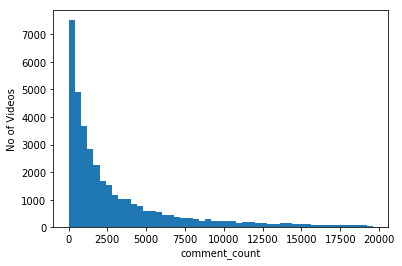

In [22]:
x = np.linspace(0, 20000, 50,endpoint=False)  # the number of comments here is up to 20,000
plt.hist(df['comment_count'],bins=x)
plt.xlabel('comment_count')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have 4000 comment or less

In [23]:
# percentage of trending videos that have less than 4000 comment around 67%
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

# Effect of using capital letters in the video title

In [24]:
def contains_capitalized_word(s):    # this function to check if a string contains a capital letter or not
    for word in s.split():
        if word.isupper():
            return True
    return False


# applying the above function on the title column to make new column of the videos with at least one capital letters word
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word) 

value_counts = df["contains_capitalized"].value_counts().to_dict()
value_counts

{False: 22949, True: 18000}

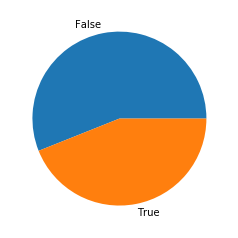

In [25]:
plt.pie(value_counts.values(), labels=value_counts.keys())  
plt.show()

The above pie-chart show that the tranding videos that contains at least one capital letters words(Orange) VS videos does not contains any capital letters word( Blue)

In [26]:
df["contains_capitalized"].value_counts(normalize=True)

False    0.560429
True     0.439571
Name: contains_capitalized, dtype: float64

This shows that he capital letters words does not affect the video to be trendy ( 56% not contain VS 43% contains)

# Effect of Title length on the trending videos

In [27]:
# This is to make a new column of the title length of each video
df["title_length"] = df["title"].apply(lambda x: len(x))

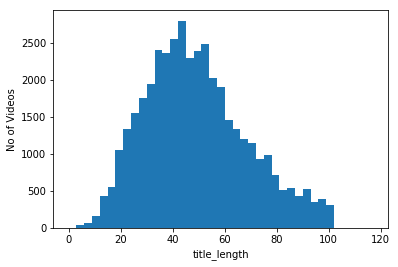

In [28]:
y = np.linspace(0, 120, 40,endpoint=False) # the number of characters here is up to 120
plt.hist(df['title_length'],bins=y)
plt.xlabel('title_length')
plt.ylabel('No of Videos')
plt.show()

The above plot shows that the majority of the trending videos have tilte length between 30-60 characters

# Relationship between views of videos and title length

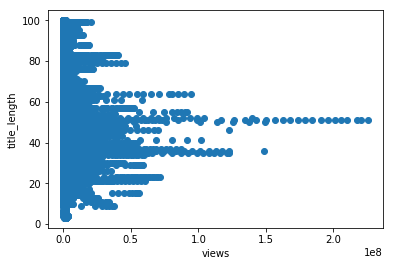

In [29]:
plt.scatter(df['views'], df['title_length'])
plt.xlabel('views')
plt.ylabel('title_length')
plt.show()

The above scatter plot shows that there is no relationship between number of views of a video and it's tilte length, however this plot shows an intersting thing, which is that the videos with tile length around 50 characters have more than 1000,000 views  

# Correlation between dataset variables

In [30]:
corr=df.corr()
corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_year,contains_capitalized,title_length
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,0.000604,0.064707,0.024199
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.079671,-0.025441,-0.035612
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.064615,-0.002951,-0.078166
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.013134,-0.021672,-0.031235
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.039043,0.019825,-0.067043
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.017102,0.009074,0.026668
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,-0.004837,0.000547,0.001442
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,0.010686,-0.020995,-0.013833
trending_year,0.000604,0.079671,0.064615,0.013134,0.039043,-0.017102,-0.004837,0.010686,1.000000,0.003471,-0.014375
contains_capitalized,0.064707,-0.025441,-0.002951,-0.021672,0.019825,0.009074,0.000547,-0.020995,0.003471,1.000000,0.126671


We see for example that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

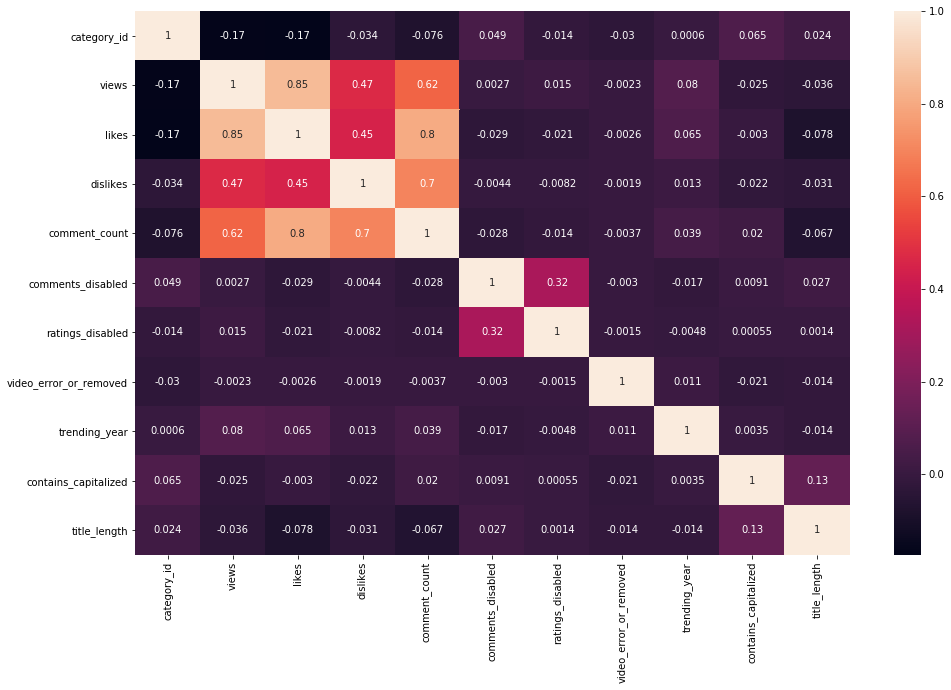

In [31]:
plt.figure(figsize = (16,10))
heatmap_correlation = sns.heatmap(corr,annot =True,square =False)

The above heatmap shows a strong relation beween views, likes, dislikes and comments count

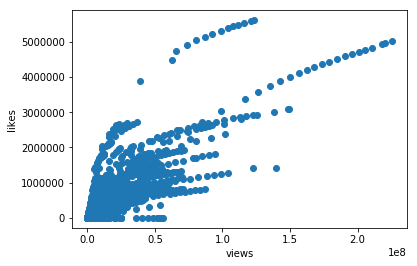

In [32]:
plt.scatter(df['views'], df['likes'])     
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

The above scatter plot between views and likes shows they are strongly positve relation( as views increases, the likes also increases)

In [33]:
title_words = list(df["title"].apply(lambda x: x.split()))  # split the title into words
title_words_flattened=[]    # define a new list to add all the words in it
for x in title_words:       # nested for loops to reach every word in all of the videos title
    for y in x:
        title_words_flattened.append(y)  

In [34]:
from collections import Counter 
Counter(title_words_flattened).most_common(25) 
# count the words of (title_words_flattened) with each word how many times appeared in the list 

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

The above list shows the most common words appeared in the trending video titles, which shows that( '-' , '|') are the most common

# Channels that have the largest number of trending videos:

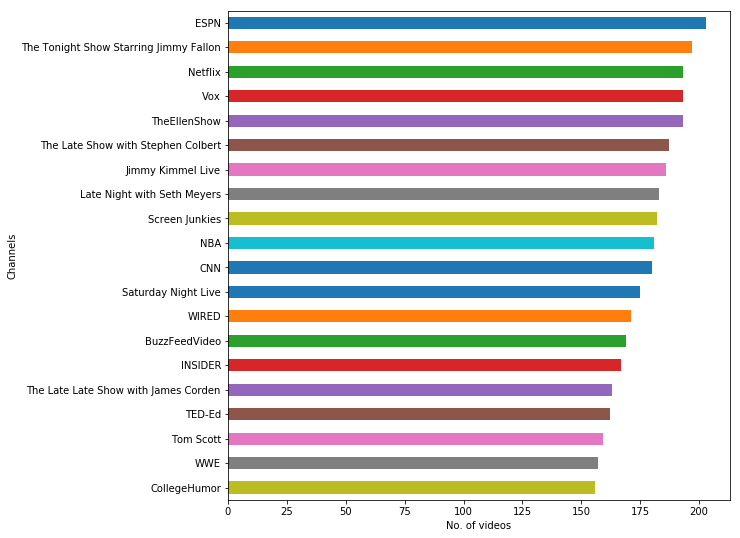

In [35]:
from matplotlib import pyplot as plt  
plt.figure(figsize=(9,9))
plt.xlabel('No. of videos')
plt.ylabel('Channels')
plt=df["channel_title"].value_counts()[:20].plot(kind='barh')
plt.invert_yaxis()


# Video category tha has the largest number of trending videos:

In [36]:
with open("US_category_id.json") as f:    
    categories = json.load(f)["items"]    # load the (items part from Json file)
cat_dict = {}
for cat in categories:    
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
#now we have to map each video category_id with it's corresponding name as it is defined the cat_dict    
df['category_name'] = df['category_id'].map(cat_dict)  

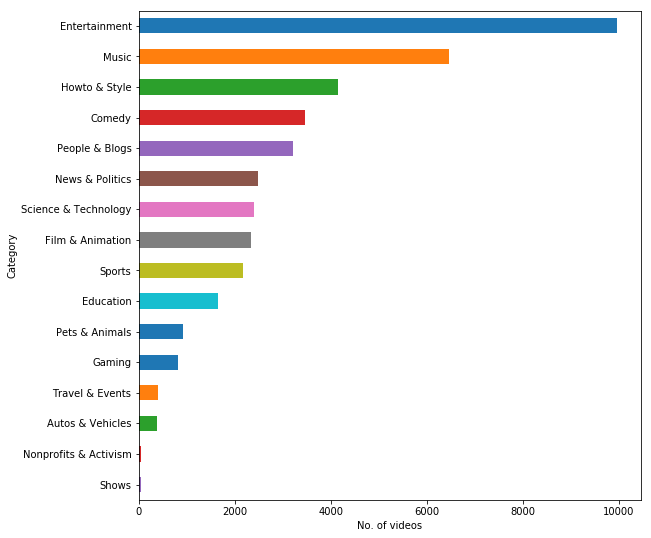

In [37]:
from matplotlib import pyplot as plt    #this to plot the channels
plt.figure(figsize=(9,9))
plt.xlabel('No. of videos')
plt.ylabel('Category')
plt=df["category_name"].value_counts()[:20].plot(kind='barh')
plt.invert_yaxis()  # this to show the most popular category at the beginning

the above bar plot shows the channels with which have trending videos, we notice that the Entertainment category is the most popular followed by Music